<a href="https://colab.research.google.com/github/nekethamahendran/Datascience/blob/main/Neketha_DIY_DAY16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Data-Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


# Compare the tota Sales for each Category of Products

In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df.groupby("Category")["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

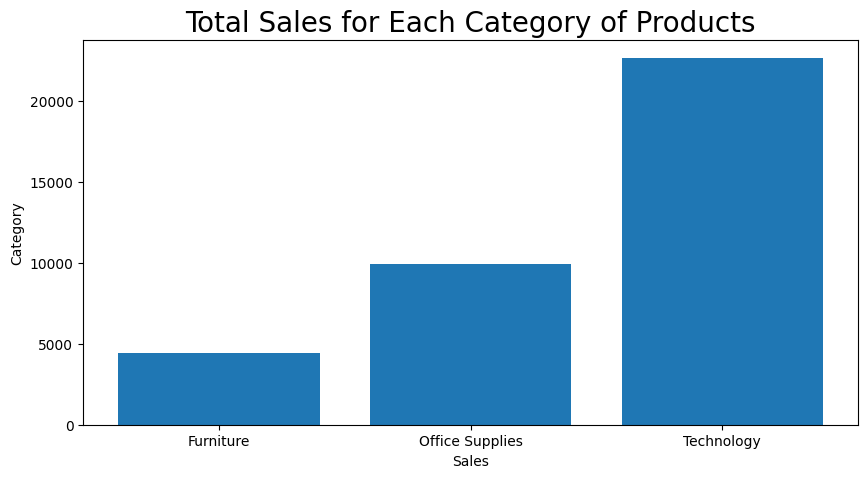

In [ ]:
plt.figure(figsize=(10,5))
plt.bar('Category','Sales',data=df)
plt.xlabel("Sales")
plt.ylabel("Category")
plt.title("Total Sales for Each Category of Products",fontsize=20)
plt.show()

# Total Number of Deals in Each American State

In [ ]:
df2=df.groupby("Category")["Sales"].sum().reset_index()
df2

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


Text(0.5, 1.0, 'Total Number of Deals in Each American State')

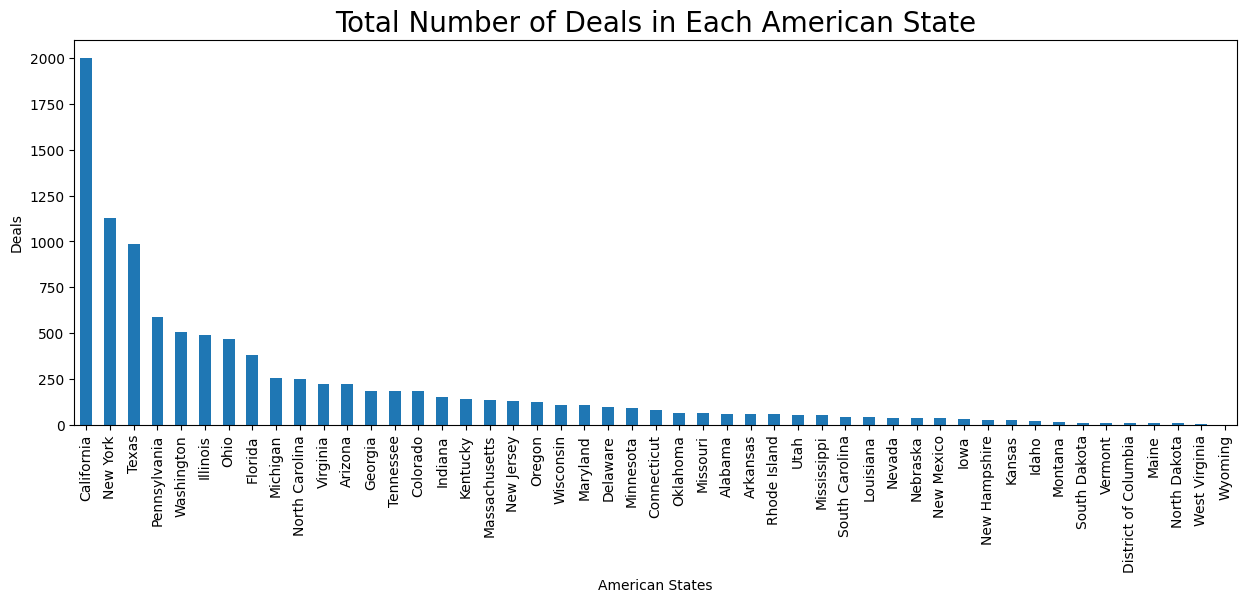

In [ ]:
df_state_dealings=df.groupby('State')['Sales'].count().sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.ylabel('Deals')
plt.xlabel('American States')
plt.title('Total Number of Deals in Each American State',fontsize=20)

# Data Grouping=II

In [ ]:
df.groupby('Country')['Profit'].sum()

Country
United States    286397.0217
Name: Profit, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/SampleSuperstore.csv")
display(df.head())

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Creating Correlation Matrix

In [ ]:
attribute=['Sales','Quantity','Discount','Profit']
corr_mat=df.corr()
corr_mat

<ipython-input-19-b5cebc2d6d85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# Plotting Correlation Using Heatmap

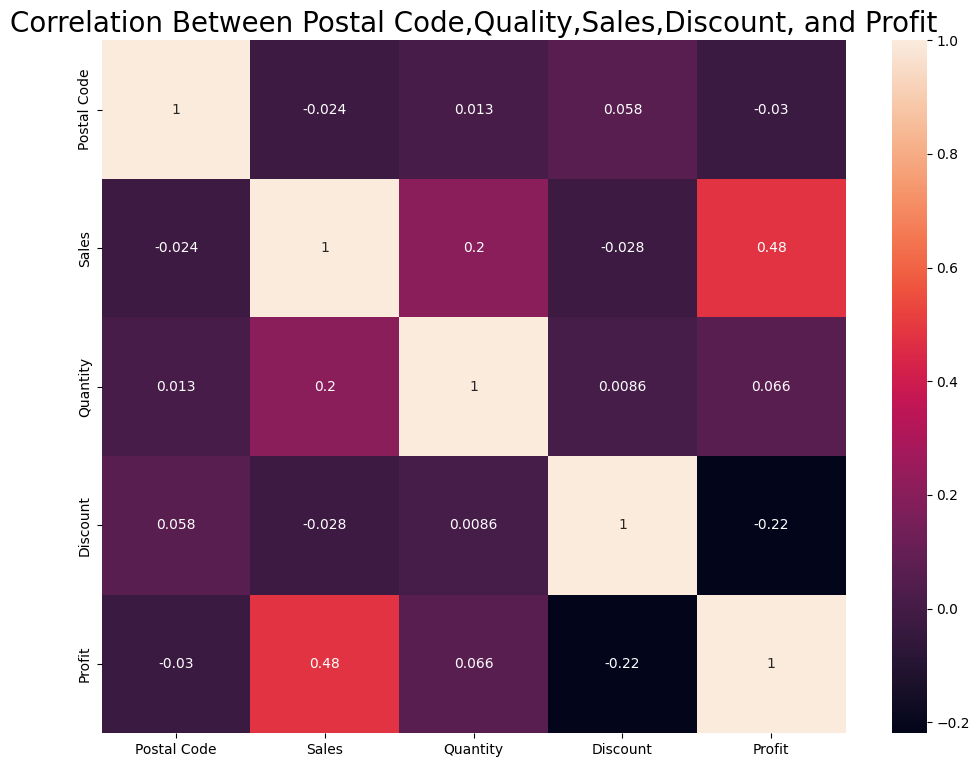

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Between Postal Code,Quality,Sales,Discount, and Profit' ,fontsize=20)
plt.show()

In [ ]:
# Assuming your data is in a DataFrame called df
# If not, you can create it using pd.DataFrame(your_data)

# Group the data by Country and calculate the total profit for each country
country_profit = df.groupby('Country')['Profit'].sum()

# Find the country with the highest profit
highest_profit_country = country_profit.idxmax()
highest_profit_value = country_profit.max()

print(f"The country with the highest profit is {highest_profit_country} with a total profit of {highest_profit_value:.2f}")


The country with the highest profit is United States with a total profit of 286397.02
